## Analysis of the complexity of the NSM Hamiltonian

#### Imports

In [6]:
from collections import Counter
from src.hamiltonian_utils import FermiHubbardHamiltonian
from src.nuclear_physics_utils import get_twobody_nuclearshell_model,SingleParticleState,QuadrupoleOperator,J2operator,write_j_square_twobody_file
import numpy as np
import torch
from typing import Dict
from src.qml_models import AdaptVQEFermiHubbard
from src.qml_utils.train import Fit
from src.qml_utils.utils import configuration
from scipy.sparse.linalg import eigsh,expm_multiply
from tqdm import trange
import matplotlib.pyplot as plt
import scipy
from typing import List
import networkx as nx

#### Data and Parameters

In [2]:
file_name:str='data/cki'
qq_filename='data/qq.p'

#### Loading the two body matrix

In [3]:
twobody_matrix,energies=get_twobody_nuclearshell_model(file_name=qq_filename)

indices=[(a,b) for a in range(len(energies)) for b in range(len(energies))]

v_matrix=np.zeros((len(energies)**2,len(energies)**2))

for key,value in twobody_matrix.items():
    
    a,b,c,d=key
    
    idx_in=indices.index((a,b))
    idx_out=indices.index((c,d))
    v_matrix[idx_in,idx_out]=value

Computing the matrix, pls wait... (u_u) 



100%|██████████| 12/12 [00:01<00:00,  6.11it/s]


#### Represent the Graph

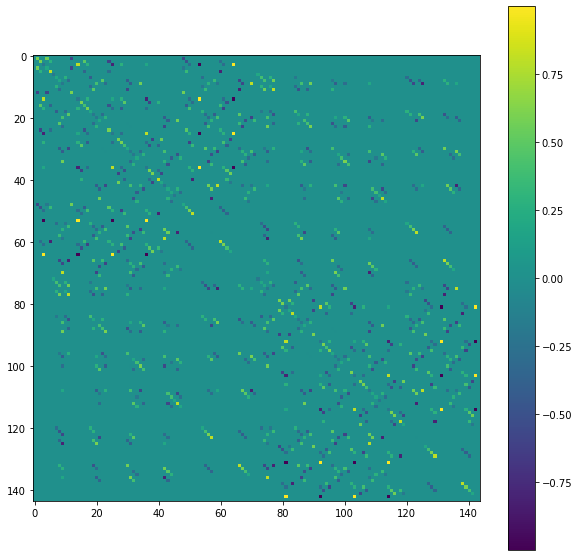

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(v_matrix)
plt.colorbar()
plt.show()

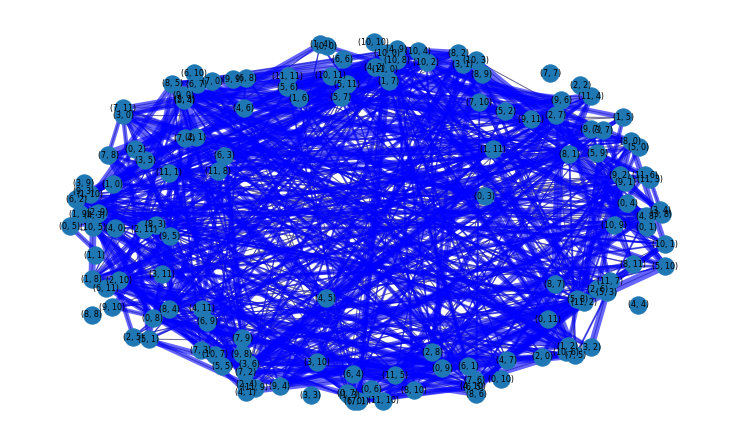

In [ ]:
# Create a graph
G = nx.Graph()

# Add nodes
for i, node in enumerate(indices):
    G.add_node(i, label=node)

# Add weighted edges
edges = []
weights = []
for i in range(len(indices)):
    for j in range(i+1 , len(indices)):
        if v_matrix[i, j] != 0:  # Only add edges for nonzero weights
            G.add_edge(i, j, weight=v_matrix[i, j])
            edges.append((i, j))
            weights.append(v_matrix[i, j])

# Normalize weights for better visualization (adjust thickness scale)
max_weight = max(weights) if weights else 1  # Avoid division by zero
edge_widths = [2 + 8 * (w / max_weight) for w in weights]  # Scale between 2 and 10

# Draw graph
plt.figure(figsize=(10, 20))
pos = nx.spring_layout(G, seed=42)  # Compute layout
labels = {i: f"{node}" for i, node in enumerate(indices)}  # Label nodes

# Draw nodes and labels
nx.draw(G, pos, with_labels=True, labels=labels, node_size=300, font_size=8, edge_color="gray")

# Draw edges with varying thickness
nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_widths, edge_color="blue", alpha=0.6)

plt.show()